In [1]:
import copy
from copy import deepcopy
import math
import logging
from collections import OrderedDict
from glob import glob
from typing import Union, List, Dict
from collections import Iterable
from time import sleep, time
from numpy.core.fromnumeric import std
import keyboard
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mne import create_info, concatenate_raws
from mne.io import RawArray
from mne.channels import make_standard_montage
from mne.filter import create_filter
from matplotlib import pyplot as plt
from scipy.signal import lfilter, lfilter_zi

from eegnb import _get_recording_dir
from eegnb.devices.eeg import EEG
from eegnb.devices.utils import EEG_INDICES, SAMPLE_FREQS
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset


def load_csv_as_raw(
    fnames: List[str],
    sfreq: float,
    ch_ind,
    aux_ind=None,
    replace_ch_names=None,
    verbose=1,
    resp_on_missing='warn'
) -> RawArray:
    """Load CSV files into an MNE Raw object.

    Args:
        fnames (array_like): list of filename(s) to load. Should end with
            ".csv".
        sfreq (float): sampling frequency of the data.
        ch_ind (array_like): column indices to keep from the CSV files.

    Keyword Args:
        aux_ind (array_like or None): list of indices for columns containing
            auxiliary channels.
        replace_ch_names (array_like or None): list of channel name mappings
            for the selected columns.
        verbose (int): verbose level.

    Returns:
        (mne.io.RawArray): concatenation of the specified filenames into a
            single Raw object.
    """


    print('\n\nLoading these files: \n')
    for f in fnames: print(f + '\n')
    print('\n\n')


    ch_ind = copy.deepcopy(ch_ind)
    n_eeg = len(ch_ind)
    if aux_ind is not None:
        n_aux = len(aux_ind)
        ch_ind += aux_ind
    else:
        n_aux = 0

    raw = []

    for fn in fnames:
        # Read the file
        data = pd.read_csv(fn)

        # Channel names and types
        ch_names = [list(data.columns)[i] for i in ch_ind] + ["stim"]
        print(ch_names)
        ch_types = ["eeg"] * n_eeg + ["misc"] * n_aux + ["stim"]

        if replace_ch_names is not None:
            ch_names = [
                c if c not in replace_ch_names.keys() else replace_ch_names[c]
                for c in ch_names
            ]
        print(ch_names)

        # Transpose EEG data and convert from uV to Volts
        data = data.values[:, ch_ind + [-1]].T
        data[:-1] *= 1e-6

        # create MNE object
        info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq, verbose=1)
        raw.append(RawArray(data=data, info=info, verbose=verbose))
    
    raws = concatenate_raws(raw, verbose=verbose)
    montage = make_standard_montage("standard_1005")
    raws.set_montage(montage,on_missing=resp_on_missing)

    return raws



c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  




Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\VibroVisual\1\1\synched_data.csv




['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=269967
    Range : 0 ... 269966 =      0.000 ...  1054.555 secs
Ready.




Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\ShapeVisual\1\1\synched_data.csv




['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
['Timestamp', 'TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=76985
    Range : 0 ... 76984 =      0.000 ...   300.719 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


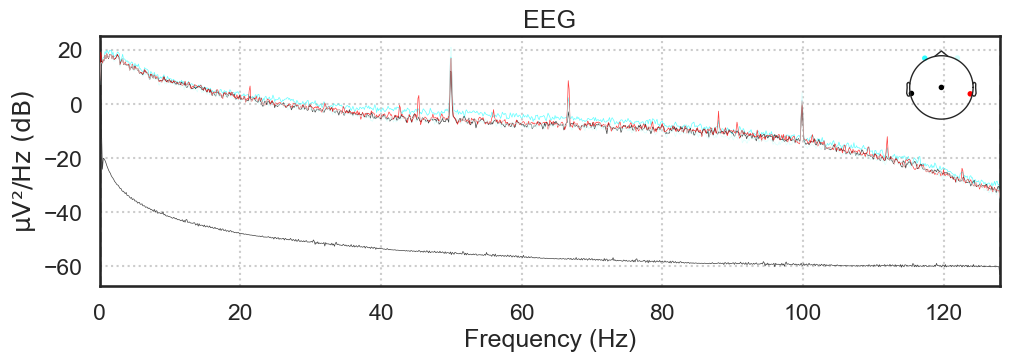

In [22]:
#raw_0 = load_csv_as_raw(["C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\VibroVisual\\1\\1\\synched_data.csv"],256, [0,1,2,3, 4])
#raw_0 = load_csv_as_raw(["C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\AudioVisual\\1\\1\\synched_data.csv"],256, [0,1,2,3, 4])
raw_0 = load_csv_as_raw(["C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\ShapeVisual\\1\\1\\synched_data.csv"],256, [0,1,2,3,4])

raw_0.plot_psd()
# raw_0.filter(1,30, method='iir');
# raw_0.plot_psd(fmin=1, fmax=30)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
